Loading the Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load datasets
df_0_selected_regions = pd.read_csv('data/data file 2/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 2/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 2/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 2/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 2/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 2/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 2/data_1_rnv.csv')

datasets = {
    "No Preprocessing": df_0_selected_regions,
    "Baseline Correction": df_baseline_corrected,
    "Smoothing": df_smoothed,
    "Normalization": df_normalized,
    "1st Derivative": df_1st_derivative,
    "2nd Derivative": df_2nd_derivative,
    "1-der SG1": df_1_der_savgol,
    "2-der SG2": df_2_der_savgol,
    "SNV": df_snv,
    "RNV": df_rnv
}

# Display the first few rows of each dataset to ensure they are loaded correctly
for name, df in datasets.items():
    print(f"\n{name} dataset:")
    print(df.head())



No Preprocessing dataset:
  thnoth_name prov_char  2996.355  2996.837   2997.32  2997.802  2998.284  \
0    Non-Thai       SUX  0.021364  0.021383  0.021439  0.021547  0.021711   
1    Non-Thai       SUX  0.014427  0.014655  0.014873  0.015088  0.015310   
2    Non-Thai       KTX  0.013520  0.013648  0.013794  0.013960  0.014146   
3    Non-Thai       SGR  0.012089  0.012421  0.012758  0.013078  0.013366   
4    Non-Thai       SSX  0.014594  0.014797  0.014981  0.015146  0.015303   

   2998.766  2999.248   2999.73  ...   727.514   727.996   728.478   728.961  \
0  0.021918  0.022146  0.022365  ...  0.067434  0.065359  0.063329  0.061421   
1  0.015549  0.015808  0.016085  ...  0.057494  0.055931  0.054566  0.053355   
2  0.014352  0.014578  0.014828  ...  0.055616  0.054881  0.054267  0.053654   
3  0.013614  0.013828  0.014020  ...  0.056227  0.054337  0.052418  0.050546   
4  0.015467  0.015649  0.015859  ...  0.054198  0.053183  0.052173  0.051142   

    729.443   729.925   730.4

In [3]:
# Define classifiers and their hyperparameters for tuning
classifiers = {
    "ExtraTrees": ExtraTreesClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LGBM": LGBMClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "LogReg": LogisticRegression()
}

param_grids = {
    "ExtraTrees": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "GradientBoosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "RandomForest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "LGBM": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "KNN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    "LDA": {'solver': ['svd', 'lsqr', 'eigen']},
    "LogReg": {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
}

# Use LOGO-CV and GridSearchCV to find the best model and parameters
from sklearn.model_selection import LeaveOneGroupOut

# Define the target variable and group variable
target = 'thnoth_name'
group = 'prov_char'

# def evaluate_model(df, model, param_grid):
#     X = df.drop(columns=[target, group])
#     y = df[target]
#     groups = df[group]

#     logo = LeaveOneGroupOut()
#     grid_search = GridSearchCV(model, param_grid, cv=logo.split(X, y, groups), n_jobs=-1, scoring='accuracy')
#     grid_search.fit(X, y)
    
#     best_model = grid_search.best_estimator_
#     print(f"Best parameters: {grid_search.best_params_}")

#     # Perform LOGO-CV with the best model
#     y_true, y_pred = [], []
#     for train_idx, test_idx in logo.split(X, y, groups):
#         best_model.fit(X.iloc[train_idx], y.iloc[train_idx])
#         y_pred.extend(best_model.predict(X.iloc[test_idx]))
#         y_true.extend(y.iloc[test_idx])
    
#     print(classification_report(y_true, y_pred, target_names=df[target].unique()))
#     return best_model

# # Evaluate ExtraTreesClassifier on No Preprocessing dataset
# print("Evaluating ExtraTreesClassifier on No Preprocessing dataset")
# best_et_model = evaluate_model(df_0_selected_regions, classifiers["ExtraTrees"], param_grids["ExtraTrees"])


In [4]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifier and parameter grid
extra_trees_classifier = ExtraTreesClassifier()
extra_trees_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}


In [5]:
# Define the target variable and group variable
target_variable = 'thnoth_name'
group_variable = 'prov_char'

def evaluate_extra_trees_model(df, model, param_grid):
    X_features = df.drop(columns=[target_variable, group_variable])
    y_target = df[target_variable]
    groups = df[group_variable]

    logo = LeaveOneGroupOut()
    grid_search = GridSearchCV(model, param_grid, cv=logo.split(X_features, y_target, groups), n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_features, y_target)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Perform LOGO-CV with the best model
    y_true, y_pred = [], []
    for train_idx, test_idx in logo.split(X_features, y_target, groups):
        best_model.fit(X_features.iloc[train_idx], y_target.iloc[train_idx])
        y_pred.extend(best_model.predict(X_features.iloc[test_idx]))
        y_true.extend(y_target.iloc[test_idx])
    
    report = classification_report(y_true, y_pred, target_names=df[target_variable].unique(), output_dict=True)
    cm = confusion_matrix(y_true, y_pred, labels=df[target_variable].unique())
    return best_model, report, cm

# Evaluate ExtraTreesClassifier on No Preprocessing dataset
print("Evaluating ExtraTreesClassifier on No Preprocessing dataset")
best_extra_trees_model, report_extra_trees, cm_extra_trees = evaluate_extra_trees_model(df_0_selected_regions, extra_trees_classifier, extra_trees_param_grid)


Evaluating ExtraTreesClassifier on No Preprocessing dataset
Best parameters: {'max_depth': None, 'n_estimators': 50}


              precision    recall  f1-score     support
Non-Thai       0.802632  0.401316  0.535088  152.000000
Thai           0.600877  0.901316  0.721053  152.000000
accuracy       0.651316  0.651316  0.651316    0.651316
macro avg      0.701754  0.651316  0.628070  304.000000
weighted avg   0.701754  0.651316  0.628070  304.000000


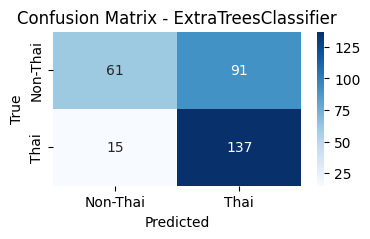

In [6]:
# Convert the report to a DataFrame for better readability
report_extra_trees_df = pd.DataFrame(report_extra_trees).transpose()

# Display the classification report
print(report_extra_trees_df)

# Display the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm_extra_trees, annot=True, fmt='d', cmap='Blues', xticklabels=df_0_selected_regions[target_variable].unique(), yticklabels=df_0_selected_regions[target_variable].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ExtraTreesClassifier')
plt.show()


SVM

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SVM classifier and parameter grid
svm_classifier = SVC()
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}


In [8]:
# Define the target variable and group variable
target_variable = 'thnoth_name'
group_variable = 'prov_char'

def evaluate_svm_model(df, model, param_grid):
    X_features = df.drop(columns=[target_variable, group_variable])
    y_target = df[target_variable]
    groups = df[group_variable]

    logo = LeaveOneGroupOut()
    grid_search = GridSearchCV(model, param_grid, cv=logo.split(X_features, y_target, groups), n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_features, y_target)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Perform LOGO-CV with the best model
    y_true, y_pred = [], []
    for train_idx, test_idx in logo.split(X_features, y_target, groups):
        best_model.fit(X_features.iloc[train_idx], y_target.iloc[train_idx])
        y_pred.extend(best_model.predict(X_features.iloc[test_idx]))
        y_true.extend(y_target.iloc[test_idx])
    
    report = classification_report(y_true, y_pred, target_names=df[target_variable].unique(), output_dict=True)
    cm = confusion_matrix(y_true, y_pred, labels=df[target_variable].unique())
    return best_model, report, cm

# Evaluate SVM classifier on No Preprocessing dataset
print("Evaluating SVM classifier on No Preprocessing dataset")
best_svm_model, report_svm, cm_svm = evaluate_svm_model(df_0_selected_regions, svm_classifier, svm_param_grid)


Evaluating SVM classifier on No Preprocessing dataset
Best parameters: {'C': 1, 'kernel': 'rbf'}


              precision    recall  f1-score     support
Non-Thai       0.039474  0.019737  0.026316  152.000000
Thai           0.346491  0.519737  0.415789  152.000000
accuracy       0.269737  0.269737  0.269737    0.269737
macro avg      0.192982  0.269737  0.221053  304.000000
weighted avg   0.192982  0.269737  0.221053  304.000000


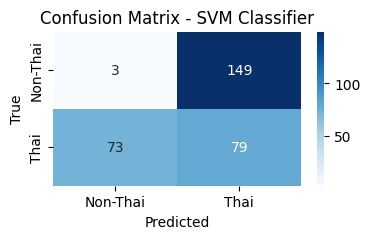

In [10]:
# Convert the report to a DataFrame for better readability
report_svm_df = pd.DataFrame(report_svm).transpose()

# Display the classification report
print(report_svm_df)

# Display the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=df_0_selected_regions[target_variable].unique(), yticklabels=df_0_selected_regions[target_variable].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()
